In [142]:
import pandas as pd
import plotly
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

churn_data = pd.read_csv('data/churn.csv', sep=',', decimal='.')

In [143]:
churn_data = churn_data.drop(labels='RowNumber', axis=1)
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [144]:
pie_data = churn_data.groupby('Exited')['Exited'].count()
pie_data = pie_data.apply(lambda x: round(x / sum(pie_data) * 100))
pie_data

Exited
0    80
1    20
Name: Exited, dtype: int64

In [145]:
fig = px.pie(
    data_frame=churn_data,
    names=churn_data['Exited'].map({1:'Лояльные', 0:'Ушедшие'}),
    title='Соотношение ушедших и лояльных клиентов',
)

fig.show()

In [146]:
pie_data = churn_data.groupby('Exited')['Exited'].count()


fig = px.pie(
    data_frame=pie_data,
    names=['Ушедшие', 'Лояльные'],
    values=pie_data,
    title='Соотношение ушедших и лояльных клиентов',
    
)

fig.show()
fig.write_html('files to share/pie.html')

In [147]:
exited_data = churn_data.groupby('Exited', as_index=False).sum()

fig=px.histogram(
    data_frame=churn_data,
    x='Tenure',
    title='Соотношение ушедших и лояльных клиентов',
    color=churn_data['Exited'].map({1:'Лояльные', 0:'Ушедшие'}),
)


fig.show()

C:\Users\qwert\AppData\Local\Temp\ipykernel_17196\1590272037.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [148]:
exited_data = churn_data.groupby('Exited', as_index=False).sum()

fig=px.histogram(
    data_frame=churn_data,
    x='Tenure',
    title='Соотношение ушедших и лояльных клиентов',
    color=churn_data['Exited'].map({1:'Лояльные', 0:'Ушедшие'})
)


fig.show()

C:\Users\qwert\AppData\Local\Temp\ipykernel_17196\4121388378.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Text(0, 0.5, 'Количество клиентов')

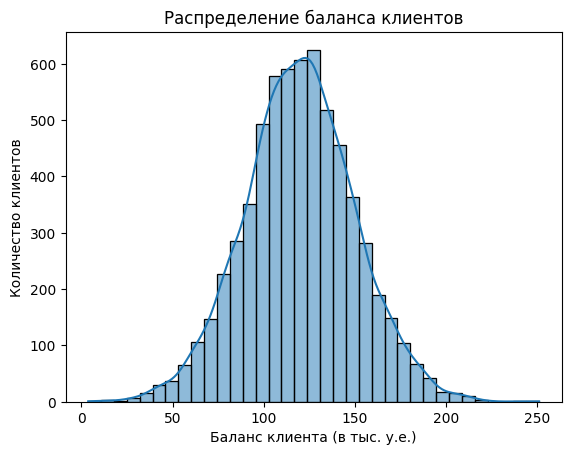

In [158]:
limited_balance = churn_data
limited_balance = limited_balance[limited_balance['Balance'] >= 2500]

histogr = sns.histplot(
    limited_balance,
    x=limited_balance['Balance'] / 1000,
    bins=35,
    kde=True,
)

histogr.set_title('Распределение баланса клиентов')
histogr.set_xlabel('Баланс клиента (в тыс. у.е.)')
histogr.set_ylabel('Количество клиентов')

Text(0, 0.5, 'Количество клиентов')

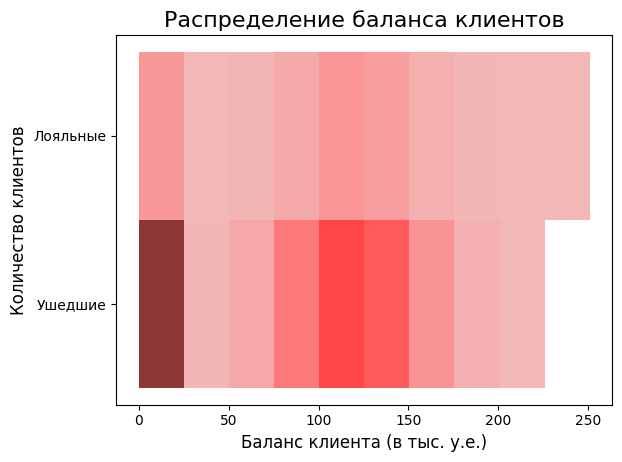

In [157]:
histogr = sns.histplot(
    churn_data,
    x=churn_data['Balance'] / 1000,
    y=churn_data['Exited'].map({1:'Лояльные', 0:'Ушедшие'}),
    bins=10,
    kde=True,
    color='red'
)

histogr.set_title('Распределение баланса клиентов', fontsize=16)
histogr.set_xlabel('Баланс клиента (в тыс. у.е.)', fontsize=12)
histogr.set_ylabel('Количество клиентов', fontsize=12)

<AxesSubplot: xlabel='Age', ylabel='Exited'>

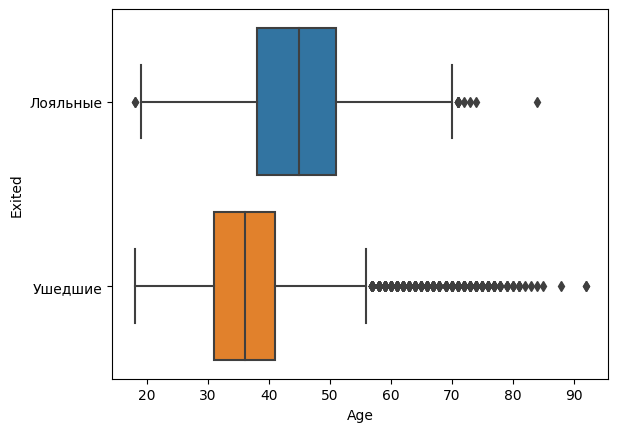

In [168]:
sns.boxplot(
    churn_data,
    x='Age',
    y=churn_data['Exited'].map({1:'Лояльные', 0:'Ушедшие'}),
    width=0.8
)